In [ ]:
%%sh
!pip install -q --upgrade pip
!pip install -q --upgrade diffusers transformers scipy ftfy huggingface_hub roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 113.7 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import os

from IPython.display import Image, display


def generate_images(
    prompt,
    num_images_to_generate,
    num_images_per_prompt=4,
    guidance_scale=8,
    output_dir="generated_images",
    display_images=False,
):

    num_iterations = num_images_to_generate // num_images_per_prompt
    os.makedirs(output_dir, exist_ok=True)

    for i in range(num_iterations):
        images = pipe(
            prompt, num_images_per_prompt=num_images_per_prompt, guidance_scale=guidance_scale
        )
        for idx, image in enumerate(images.images):
            image_name = f"{output_dir}/image_{(i*num_images_per_prompt)+idx}.png"
            image.save(image_name)
            if display_images:
                display(Image(filename=image_name, width=128, height=128))

  0%|          | 0/50 [00:00<?, ?it/s]

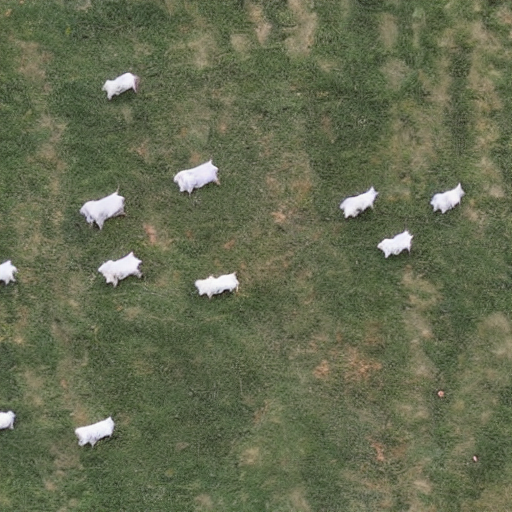

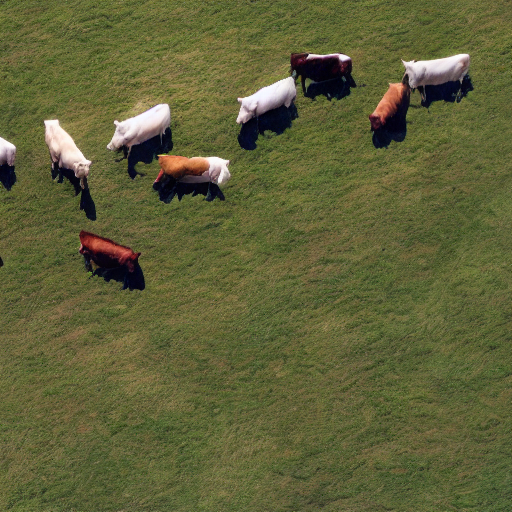

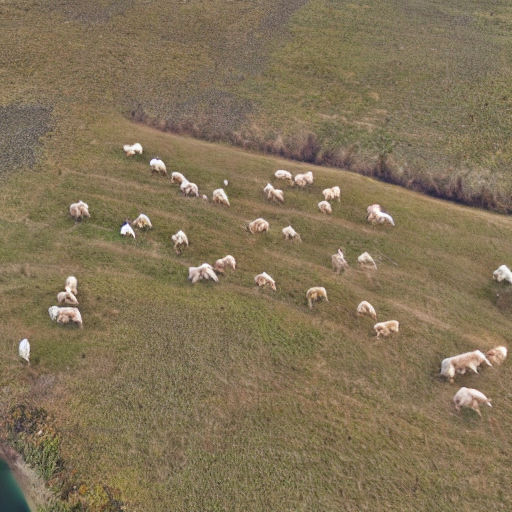

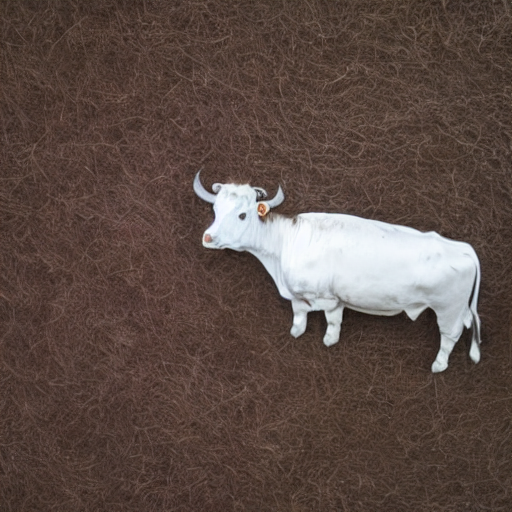

  0%|          | 0/50 [00:00<?, ?it/s]

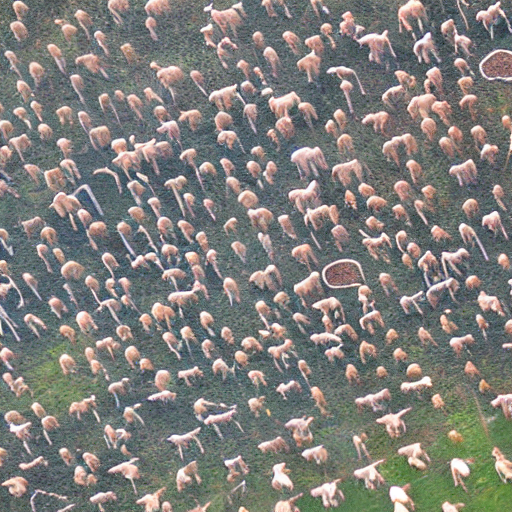

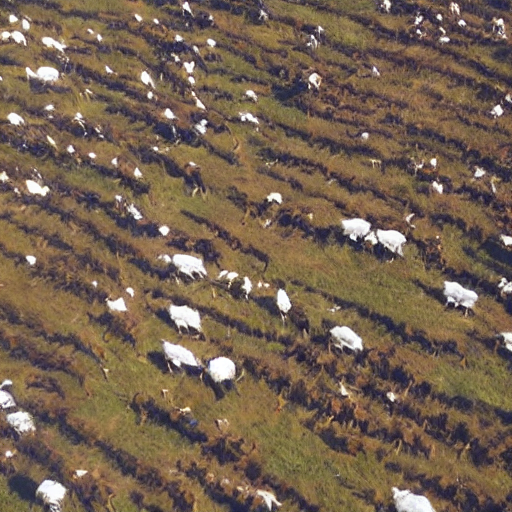

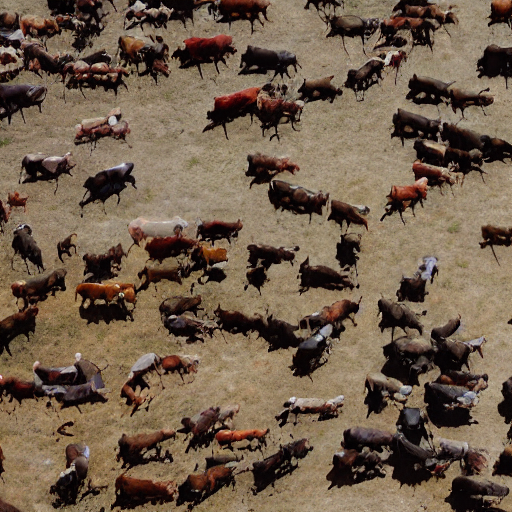

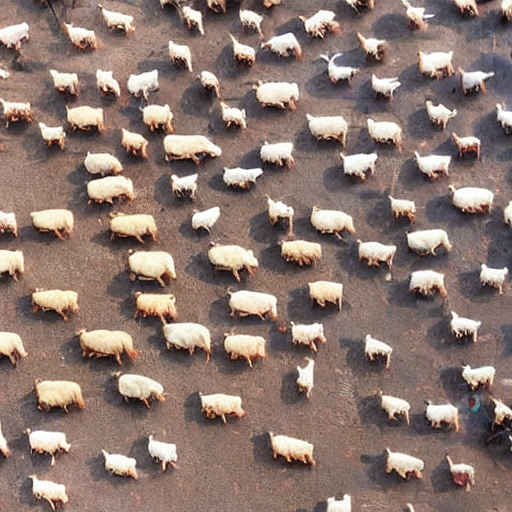

  0%|          | 0/50 [00:00<?, ?it/s]

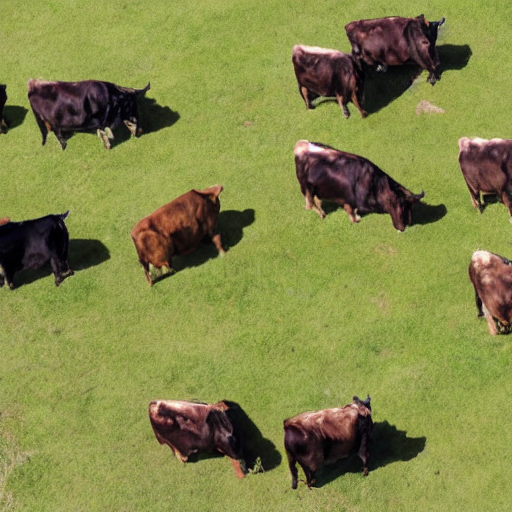

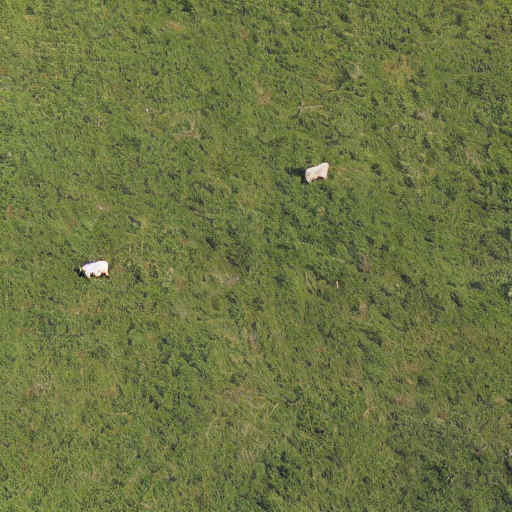

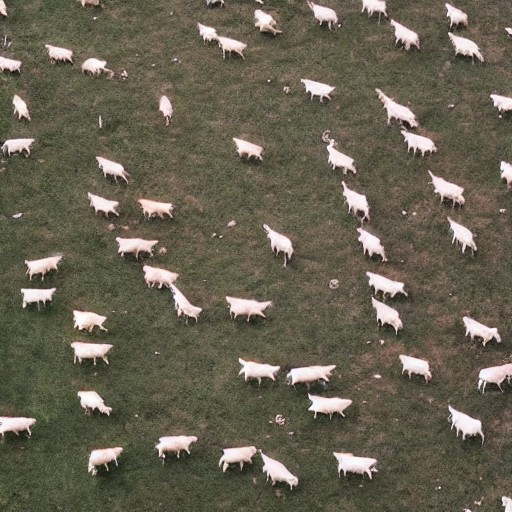

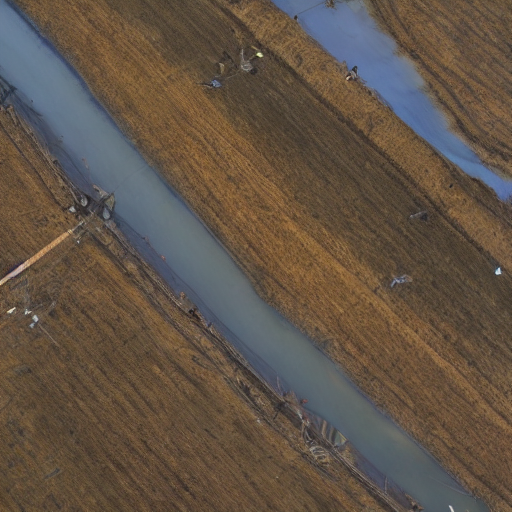

In [ ]:
generate_images("aerial view of cattle", 12, guidance_scale=4, display_images=True)

In [ ]:
import os
HOME = os.getcwd()

In [14]:
PROJECT_NAME = "ai-generated-images-ect7f"
PROJECT_DESCRIPTION = "ai-generated-images-ect7f"

In [15]:
import roboflow
from roboflow import Roboflow

roboflow.login()

workspace = Roboflow().workspace()
new_project = workspace.create_project(
    project_name=PROJECT_NAME,
    project_license="MIT",
    project_type="instance-segmentation",
    annotation=PROJECT_DESCRIPTION)

Paste the authentication token here: ··········


In [17]:
from roboflow import Roboflow
import glob
import os

# glob params
image_dir = os.path.join(HOME, "generated_images", "")
file_extension_type = ".png"

roboflow.login()

rf = Roboflow()

project = rf.workspace("mid-construction-ai").project("ai-generated-images-ect7f-ligln")

# glob images
image_glob = glob.glob(image_dir + '/*' + file_extension_type)

# perform upload
for image in image_glob:
    project.upload(image, num_retry_uploads=3)
    print("*** Processing image [" + str(len(image_glob)) + "] - " + image + " ***")